---
# Imports

In [1]:
# imports.py
from imports import *
from sklearn.datasets import make_blobs

# plotting magic
%matplotlib inline

# custom mods
import tidy
import model_h
import wrangle

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


---
# Tidiness

In [2]:
df=wrangle.wrangle_df()
df.info()
# model_h.print_btcusd(df)
df.head()

cached csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2770 entries, 2014-10-20 to 2022-05-24
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2770 non-null   float64
 1   high                          2770 non-null   float64
 2   low                           2770 non-null   float64
 3   close                         2770 non-null   float64
 4   volume                        2770 non-null   float64
 5   fwd_log_ret                   2770 non-null   float64
 6   fwd_ret                       2770 non-null   float64
 7   fwd_pct_chg                   2770 non-null   float64
 8   fwd_close_positive            2770 non-null   float64
 9   macd                          2770 non-null   float64
 10  signal                        2770 non-null   float64
 11  histo                         2770 non-null   float64
 12  cross                         277

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,macd,signal,histo,cross,histy,month_9,month_10,day_20,day_1,day_9,atr_above_threshold_0.01,atr_above_threshold_0.05,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners,sentiment,obv_close_product
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000.0,0.009437,3.630005,0.009482,1.0,-6.216836,-14.504225,8.287389,0.0,1.0,0.0,1.0,1.0,0.0,0.0,False,False,False,False,False,0.059651,2.830044,24.826121,3.500248e+10,233157.697776,1.747486e+06,4198.799233,0.234784,0.458883
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900.0,-0.008620,-3.317016,-0.008583,0.0,-5.196584,-12.642697,7.446112,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,233157.697776,1.903490e+06,5726.216590,0.274812,0.510393
2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300.0,-0.066750,-24.740998,-0.064571,0.0,-4.602627,-11.034683,6.432056,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590,0.258505,0.465414
2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900.0,-0.000201,-0.071991,-0.000201,0.0,-6.058464,-10.039439,3.980975,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,0.060749,2.566983,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590,0.277373,0.286309
2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700.0,-0.031391,-11.074005,-0.030903,0.0,-7.135779,-9.458707,2.322928,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,0.056403,2.566983,18.762679,3.500248e+10,297537.062088,1.603290e+06,4819.681933,0.276173,0.302494


<AxesSubplot:>

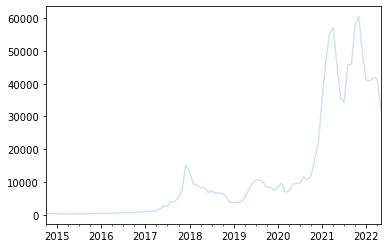

In [3]:
df.close.resample('m').mean().plot(alpha=.2, label='resample')

In [4]:
train_i, validate=tidy.split_i(df)
validate.info(),validate.head()
# train_ii, test=tidy.split_ii(df)
# train_ii.info(),test.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2022-03-23 to 2022-04-23
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          32 non-null     float64
 1   high                          32 non-null     float64
 2   low                           32 non-null     float64
 3   close                         32 non-null     float64
 4   volume                        32 non-null     float64
 5   fwd_log_ret                   32 non-null     float64
 6   fwd_ret                       32 non-null     float64
 7   fwd_pct_chg                   32 non-null     float64
 8   fwd_close_positive            32 non-null     float64
 9   macd                          32 non-null     float64
 10  signal                        32 non-null     float64
 11  histo                         32 non-null     float64
 12  cross                         32 non-null     

(None,
                     open          high           low         close  \
 2022-03-23  42364.378906  42893.507813  41877.507813  42892.957031   
 2022-03-24  42886.652344  44131.855469  42726.164063  43960.933594   
 2022-03-25  43964.546875  44999.492188  43706.285156  44348.730469   
 2022-03-26  44349.859375  44735.996094  44166.273438  44500.828125   
 2022-03-27  44505.355469  46827.546875  44437.292969  46820.492188   
 
                   volume  fwd_log_ret      fwd_ret  fwd_pct_chg  \
 2022-03-23  2.524294e+10     0.024594  1067.976563     0.024899   
 2022-03-24  3.104299e+10     0.008783   387.796875     0.008821   
 2022-03-25  3.057441e+10     0.003424   152.097656     0.003430   
 2022-03-26  1.695046e+10     0.050813  2319.664063     0.052126   
 2022-03-27  2.816089e+10     0.006546   307.511718     0.006568   
 
             fwd_close_positive         macd      signal       histo  cross  \
 2022-03-23                 1.0   496.267336  152.548856  343.718480    0.0 

---
# Baseline

In [5]:
(train_i.close[-1]-train_i.close[0])/len(train_i)

# UPDATE: DAILY simple return
# this is simple return if you bought 1 btc in 2014-09-17 and sold in 2022-03-23

15.506451271887698

In [6]:
(train_i.close.sum()-train_i.open.sum())/len(train_i)

# UPDATE: DAILY simple return
# this is simple return if you bought every morning and sold every night

13.817506896932604

In [7]:
1-36491.43405399999/37403.99116999656


0.02439731930876332

---
# MACD 

In [8]:
# def macd_df(df):
# 	'''
# 	macd encoder
# 	'''
# 	return macker, mac
	

In [9]:
# macd, signal, histo = talib.MACD(df.close,fastperiod=12, slowperiod=26, signalperiod=9)
# mac=pd.concat([df,macd,signal,histo],axis=1)
# mac=mac.rename(columns={0:'macd',1:'signal',2:'histo'})
# mac=mac.drop(mac[mac.index<'2014-10-20'].index)
# mac=mac.fillna(0)

In [10]:
# mac.head()

In [11]:
# cools=mac.histo>0
# # start=cools[0]
# not_list=[]


In [12]:

# for x in cools:
# 	if x:
# 		not_list.append(1)
# 	else:
# 		not_list.append(0)


In [13]:
# not_list

In [14]:

# not_list=pd.Series(not_list, index=mac.index)


In [15]:
# bools=mac.macd>mac.signal
# yesterday=bools[0]
# list=[]


In [16]:

# for today in bools:
# 	if today==yesterday:
# 		list.append(0)
# 		continue
# 	else:
# 		list.append(1)
# 		yesterday=today

# list=pd.Series(list, index=mac.index)

# # crossover indicator
# macker=pd.concat([mac.close,list,not_list],axis=1)
# macker=macker.rename({0:'cross',1:'histy'},axis=1)


In [17]:

# macker, mac=macd_df(train_i)

In [18]:
def macd_roi(df):
	buy=[]
	sell=[]
	for i in df.index:
		if df.loc[i].cross > 0:
			if df.loc[i].histy > 0:
				buy.append(df.loc[i].close)
				sell.append(0)
			else:
				buy.append(0)
				sell.append(df.loc[i].close)
		else:
			continue
	return buy,sell
	
buy,sell=macd_roi(df)

In [19]:
profits=pd.DataFrame({'buy':buy,'sell':sell})

In [20]:
profits.head()

,buy,sell
0,0.000000,354.704010
1,349.290009,0.000000
2,0.000000,350.847992
3,378.046997,0.000000
4,0.000000,369.604004


In [21]:
if profits.buy.loc[0] == 0:
	profits=profits.drop(0)
	profits.sell=profits.sell.shift(-1)
else:
	profits.sell=profits.sell.shift(-1)

In [22]:
(profits.sell-profits.buy).sum()

36491.43405399999

In [23]:


# dataset_1 = np.exp(x**0.25) - np.exp(x**0.5)
# dataset_2 = np.sin(0.4 * np.pi * x**0.5) + np.cos(0.8 * np.pi * x**0.25)
 
# # Creating plot with dataset_1
# fig, ax1 = plt.subplots()
 
# color = 'tab:red'
# ax1.set_xlabel('X-axis')
# ax1.set_ylabel('Y1-axis', color = color)

# ax1.tick_params(axis ='y', labelcolor = color)
 
# # Adding Twin Axes to plot using dataset_2
# ax2 = ax1.twinx()
 
# color = 'tab:green'
# ax2.set_ylabel('Y2-axis', color = color)

# ax2.tick_params(axis ='y', labelcolor = color)
 
# # Adding title
# plt.title('Use different y-axes on the left and right of a Matplotlib plot', fontweight ="bold")
 
# # Show plot
# plt.show()

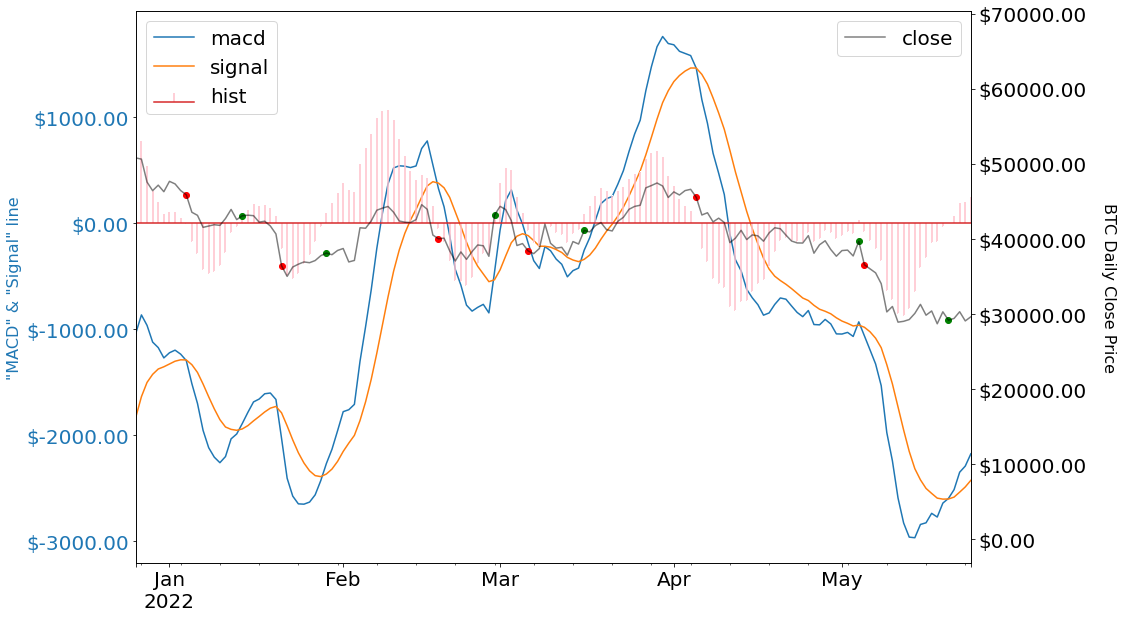

In [54]:
def macd_plot(df):
	fig, ax1 = plt.subplots(figsize=(16, 9))

	rect = fig.patch
	rect.set_facecolor('white')

	color = 'tab:blue'
	# ax1.set_xlabel('Date',size=16)
	ax1.set_ylabel('"MACD" & "Signal" line', color = color,size=16)
	ax1.yaxis.set_major_formatter('${x:1.2f}')

	ax1.tick_params(axis ='y', labelcolor = color)

	df.macd.tail(150).plot()
	df.signal.tail(150).plot()
	plt.stem(df.index[-150:],df['histo'].tail(150),linefmt='pink',markerfmt='w,',label='hist')


	ax2 = ax1.twinx()
	
	color = 'black'
	ax2.set_ylabel('BTC Daily Close Price', color = color,rotation=270, labelpad=30,size=16)
	ax2.yaxis.set_major_formatter('${x:1.2f}')

	ax2.tick_params(axis ='y', labelcolor = color)

	_=df[(df.cross==1)&(df.histy==1)].tail(500)
	plt.scatter(y=_.close,x=_.index,c='green')

	_=df[(df.cross==1)&(df.histy==0)].tail(500)
	plt.scatter(y=_.close,x=_.index,c='red')

	df.close.tail(150).plot(color='black',alpha=.5)

	ax1.legend(loc=2)
	ax2.legend(loc=1)

	plt.tight_layout()
	# plt.rc('font',size=20)
	plt.show()


	#wip


macd_plot(df)

---
# Xy Split

In [25]:
X=df[['open', 'high', 'low', 'close', 'volume', 'obv_close_product', 'macd', 'signal', 'histo', 'cross', 'histy', 'atr_above_threshold_0.01',
       'atr_above_threshold_0.05', 'atr_above_threshold_0.1',
       'atr_above_threshold_0.2', 'atr_above_threshold_0.3','sentiment']]

In [26]:
y=df[['fwd_log_ret', 'fwd_ret', 'fwd_pct_chg', 'fwd_close_positive']]

In [27]:
X_train, X_val=tidy.split_i(X)

In [28]:
y_train, y_val=tidy.split_i(y)

In [29]:
smaller=X_train.volume.copy()

X_train.volume=smaller.astype('float64')

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_12622/3875323173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.volume=smaller.astype('float64')


In [30]:
for col in X_train.columns:
	if X_train[col].dtype == 'float64':
		xs=np.array(X_train[[col]]).reshape(-1, 1)
		X_train.loc[:,col]=RobustScaler().fit_transform(xs)
		print(col)


open
high
low
close
volume
obv_close_product
macd
signal
histo
cross
histy
sentiment


/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_12622/1090873265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,col]=RobustScaler().fit_transform(xs)
/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_12622/1090873265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,col]=RobustScaler().fit_transform(xs)
/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_12622/1090873265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [31]:
X_train.describe()

,open,high,low,close,volume,obv_close_product,macd,signal,histo,cross,histy,sentiment
count,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000,2707.000000
mean,0.525840,0.533626,0.516779,0.527985,0.387038,0.116681,0.402577,0.404309,-0.009496,0.062061,-0.464352,0.194757
std,1.609413,1.613690,1.605778,1.610247,0.799069,0.529619,3.924210,3.721983,4.431608,0.241311,0.498820,1.019317
min,-0.615122,-0.607568,-0.622991,-0.614460,-0.211542,-0.497221,-20.902031,-18.308276,-28.642982,0.000000,-1.000000,-2.983316
25%,-0.570554,-0.566449,-0.577545,-0.569934,-0.208369,-0.395510,-0.201737,-0.219077,-0.416191,0.000000,-1.000000,-0.490617
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.429446,0.433551,0.422455,0.430066,0.791631,0.604490,0.798263,0.780923,0.583809,0.000000,0.000000,0.509383
max,6.011749,5.979699,6.080324,6.015380,13.796290,0.991045,21.763503,18.587249,22.043847,1.000000,0.000000,6.193605


---
# Clustering

In [32]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [33]:

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [34]:
y_train.head()

,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
2014-10-20,0.009437,3.630005,0.009482,1.0
2014-10-21,-0.008620,-3.317016,-0.008583,0.0
2014-10-22,-0.066750,-24.740998,-0.064571,0.0
2014-10-23,-0.000201,-0.071991,-0.000201,0.0
2014-10-24,-0.031391,-11.074005,-0.030903,0.0


In [35]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train.fwd_close_positive, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train.fwd_close_positive, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train.fwd_close_positive, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train.fwd_close_positive, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_train.fwd_close_positive, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, labels))

Estimated number of clusters: 11
Estimated number of noise points: 2149
Homogeneity: 0.003
Completeness: 0.002
V-measure: 0.003
Adjusted Rand Index: -0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: -0.331


In [36]:
np.argwhere(np.isnan(labels))

array([], shape=(0, 1), dtype=int64)

In [37]:
labels=pd.DataFrame(labels,columns=['clust'],dtype='int',index=X_train.index)

In [38]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2014-10-20 to 2022-03-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   clust   2707 non-null   int64
dtypes: int64(1)
memory usage: 42.3 KB


In [39]:
type(labels.clust.iloc[0])

numpy.int64

In [40]:
type(X_train.open.iloc[0])

numpy.float64

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2014-10-20 to 2022-03-22
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      2707 non-null   float64
 1   high                      2707 non-null   float64
 2   low                       2707 non-null   float64
 3   close                     2707 non-null   float64
 4   volume                    2707 non-null   float64
 5   obv_close_product         2707 non-null   float64
 6   macd                      2707 non-null   float64
 7   signal                    2707 non-null   float64
 8   histo                     2707 non-null   float64
 9   cross                     2707 non-null   float64
 10  histy                     2707 non-null   float64
 11  atr_above_threshold_0.01  2707 non-null   object 
 12  atr_above_threshold_0.05  2707 non-null   object 
 13  atr_above_threshold_0.1   2707 non-null   obj

In [42]:
X_train=pd.concat([X_train,labels],axis=1)

In [43]:
xt=X_train.loc['2018':'2021']

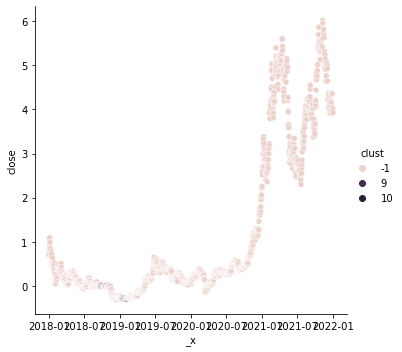

In [44]:
sns.relplot(x=X_train.loc['2018':'2021'].index, y=X_train.loc['2018':'2021'].close, hue=X_train.loc['2018':'2021'].clust)

In [45]:
X_train.head()

,open,high,low,close,volume,obv_close_product,macd,signal,histo,cross,histy,atr_above_threshold_0.01,atr_above_threshold_0.05,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,sentiment,clust
2014-10-20,-0.594237,-0.590436,-0.602060,-0.594318,-0.211145,0.185718,-0.050510,-0.081143,0.128572,0.0,0.0,False,False,False,False,False,1.415845,0
2014-10-21,-0.594907,-0.590190,-0.601799,-0.593960,-0.211234,0.262380,-0.046294,-0.073474,0.114357,0.0,0.0,False,False,False,False,False,1.881179,0
2014-10-22,-0.594543,-0.590581,-0.601655,-0.594287,-0.211336,0.195438,-0.043841,-0.066850,0.097223,0.0,0.0,False,False,False,False,False,1.691602,-1
2014-10-23,-0.594853,-0.590920,-0.604268,-0.596721,-0.210745,-0.071116,-0.049855,-0.062750,0.055808,0.0,0.0,False,False,False,False,False,1.910950,0
2014-10-24,-0.597251,-0.592908,-0.604586,-0.596728,-0.211179,-0.047029,-0.054306,-0.060357,0.027793,0.0,0.0,False,False,False,False,False,1.897002,0


In [46]:
# X_train=X_train.drop('clust',axis=1)